In [1]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
#buy and hold strategy vs various  strategies
def backtestAll(ticker:ab.StockData,test_start:dt.datetime,test_end:dt.datetime, verbose = True):
    perf_summary = pd.DataFrame()
    buy_and_hold = ab.BuyAndHold() 
    buy_and_hold.run_strategy(ticker, test_start,test_end)
    bt = ab.BackTest(test_start, test_end)
    bt.run_backtest(buy_and_hold, ticker)

    macross_strategy = ab.MACross('Ma Cross',50, 200)
    macross_strategy.run_strategy(ticker, test_start ,test_end)
    ma_cross_bt = ab.BackTest(test_start, test_end)
    ma_cross_bt.run_backtest(macross_strategy, ticker)

    threshold_strategy = ab.Threshold(signal_data = naa200r, name='NAA200R', indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
    threshold_strategy.run_strategy(ticker, test_start , test_end)
    naa200r_threshold_bt = ab.BackTest(test_start , test_end)
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker)

    ma_threshold = ab.MAThreshold('SMA200', ma_window = 200,buy_threshold = 1.05, sell_threshold = 0.95)
    ma_threshold.run_strategy(ticker, test_start,test_end)
    ma_threshold_bt = ab.BackTest(test_start, test_end)
    ma_threshold_bt.run_backtest(ma_threshold, ticker)

    ma_threshold2 = ab.MAThreshold('SMA200', ma_window = 200,buy_threshold = 1.03, sell_threshold = 0.95)
    ma_threshold2.run_strategy(ticker, test_start,test_end)
    ma_threshold2_bt = ab.BackTest(test_start, test_end)
    ma_threshold2_bt.run_backtest(ma_threshold2, ticker)
    
    WeeklyMAThreshold = ab.WeeklyMAThreshold('2W SMA200', ma_window =40,buy_threshold=1,sell_threshold=1)
    WeeklyMAThreshold.run_strategy(ticker, test_start , test_end)
    WeeklyMAThreshold_bt = ab.BackTest(test_start , test_end)
    WeeklyMAThreshold_bt.run_backtest(WeeklyMAThreshold, ticker)

    print('Backtest for', ticker.ticker)
    bt.performance_summary()
    ma_cross_bt.performance_summary()
    naa200r_threshold_bt.performance_summary()
    ma_threshold_bt.performance_summary()
    ma_threshold2_bt.performance_summary()
    WeeklyMAThreshold_bt.performance_summary()
    
    fig = plt.figure(figsize=(16,4))
    plt.plot(bt.balance['Date'], bt.balance['Total'], label = bt.name ,color = 'blue')
    plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'], label = ma_cross_bt.name, color = 'red')
    plt.plot(naa200r_threshold_bt.balance['Date'], naa200r_threshold_bt.balance['Total'], label = naa200r_threshold_bt.name, color = 'green')
    plt.plot(ma_threshold_bt.balance['Date'], ma_threshold_bt.balance['Total'], label = ma_threshold_bt.name)
    plt.plot(ma_threshold2_bt.balance['Date'], ma_threshold2_bt.balance['Total'], label = ma_threshold2_bt.name)
    plt.plot(WeeklyMAThreshold_bt.balance['Date'], WeeklyMAThreshold_bt.balance['Total'], label = WeeklyMAThreshold_bt.name)
 
    plt.legend()
    plt.title('Backtesting for {}'.format(ticker.ticker))
    plt.show()


    for strategy in [bt,ma_cross_bt,naa200r_threshold_bt, ma_threshold_bt, ma_threshold2_bt, WeeklyMAThreshold_bt]:
        perf_summary = pd.concat([perf_summary, strategy.summary_result])
        
    return perf_summary


Backtest for QQQ

Performance Summary of Buy and Hold: 
cumulative return      : 34.72%,
compound anual return  : -19.0711% 
max_drawdown           : -35.52%, 
sharp_ratio            : 2.95%, 
average of daily return: 0.0547%, 
std of daily return    : 1.8528%,
number of trades       : 2,
trading days           : 1155,
        
Betting Average  : 100.00%
Gain Average     : 34.72%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of Ma Cross 50/200: 
cumulative return      : 51.17%,
compound anual return  : -12.5422% 
max_drawdown           : -28.56%, 
sharp_ratio            : 4.27%, 
average of daily return: 0.0629%, 
std of daily return    : 1.4718%,
number of trades       : 3,
trading days           : 1155,
        
Betting Average  : 100.00%
Gain Average     : 49.21%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of NAA200R 15/30 MA 20: 
cumulative r

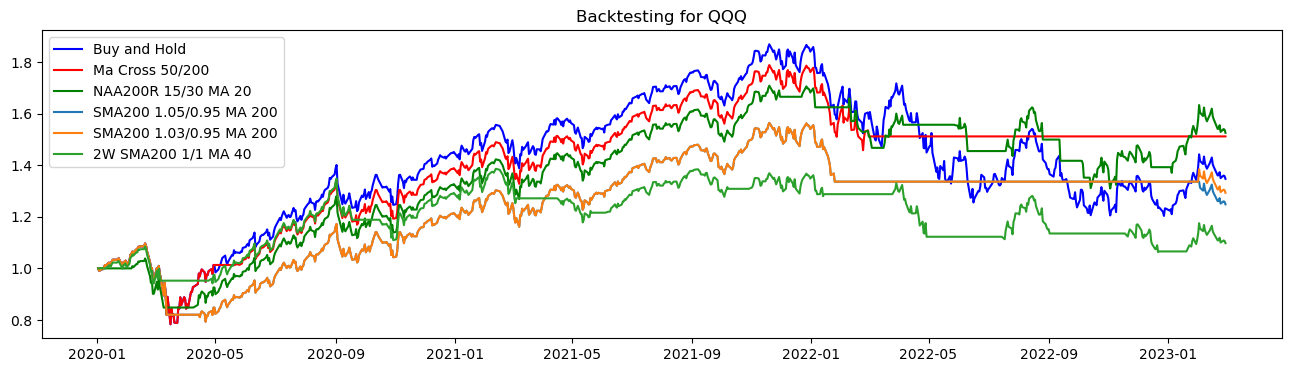

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,0.347150,-0.190711,-0.355207,0.029530,0.000547,0.018528,1155
0,Ma Cross 50/200,3,0.511673,-0.125422,-0.285594,0.042724,0.000629,0.014718,1155
0,NAA200R 15/30 MA 20,14,0.525714,-0.120674,-0.233286,0.046040,0.000623,0.013538,1155
0,SMA200 1.05/0.95 MA 200,4,0.248296,-0.243177,-0.276368,0.029096,0.000353,0.012144,1155
0,SMA200 1.03/0.95 MA 200,4,0.293098,-0.217648,-0.276368,0.032638,0.000398,0.012209,1155
0,2W SMA200 1/1 MA 40,11,0.097776,-0.371875,-0.222358,0.015867,0.000187,0.011766,1155


In [3]:
test_start = dt.datetime(2020,1,1) # dt.datetime(2003,3,10)
test_end = dt.datetime(2023,3,1)

perf_summary = backtestAll(qqq, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for QLD

Performance Summary of Buy and Hold: 
cumulative return      : 30.46%,
compound anual return  : -21.1585% 
max_drawdown           : -63.19%, 
sharp_ratio            : 2.78%, 
average of daily return: 0.1033%, 
std of daily return    : 3.7180%,
number of trades       : 2,
trading days           : 1155,
        
Betting Average  : 100.00%
Gain Average     : 30.46%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of Ma Cross 50/200: 
cumulative return      : 60.93%,
compound anual return  : -9.4337% 
max_drawdown           : -51.72%, 
sharp_ratio            : 3.53%, 
average of daily return: 0.1034%, 
std of daily return    : 2.9241%,
number of trades       : 3,
trading days           : 1155,
        
Betting Average  : 100.00%
Gain Average     : 97.85%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of NAA200R 15/30 MA 20: 
cumulative re

/mnt/c/Users/zw627/Downloads/backtesting/Ab.py:373: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))


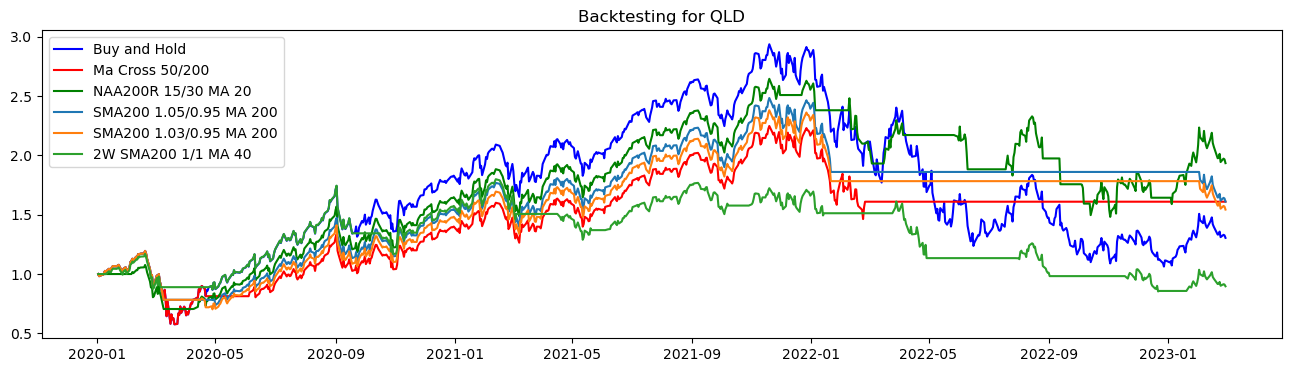

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,0.304631,-0.211585,-0.631892,0.027794,0.001033,0.037180,1155
0,Ma Cross 50/200,3,0.609304,-0.094337,-0.517154,0.035345,0.001034,0.029241,1155
0,NAA200R 15/30 MA 20,14,0.933939,-0.013576,-0.439676,0.044266,0.001199,0.027078,1155
0,SMA200 1.05/0.95 MA 200,4,0.610106,-0.094098,-0.381837,0.038218,0.000849,0.022216,1155
0,SMA200 1.03/0.95 MA 200,5,0.543050,-0.114950,-0.411947,0.035602,0.000803,0.022567,1155
0,2W SMA200 1/1 MA 40,11,-0.103092,NaN,-0.500676,0.005634,0.000130,0.022994,1155


In [4]:
perf_summary = backtestAll(qld, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for TQQQ

Performance Summary of Buy and Hold: 
cumulative return      : -4.93%,
compound anual return  : nan% 
max_drawdown           : -81.11%, 
sharp_ratio            : 2.68%, 
average of daily return: 0.1465%, 
std of daily return    : 5.4716%,
number of trades       : 2,
trading days           : 1155,
        
Betting Average  : 0.00%
Gain Average     : nan%
Loss Average     : -4.93%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of Ma Cross 50/200: 
cumulative return      : 51.26%,
compound anual return  : -12.5090% 
max_drawdown           : -69.92%, 
sharp_ratio            : 3.41%, 
average of daily return: 0.1435%, 
std of daily return    : 4.2133%,
number of trades       : 3,
trading days           : 1155,
        
Betting Average  : 100.00%
Gain Average     : 111.07%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of NAA200R 15/30 MA 20: 
cumulative return

/mnt/c/Users/zw627/Downloads/backtesting/Ab.py:373: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))
/mnt/c/Users/zw627/Downloads/backtesting/Ab.py:373: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))


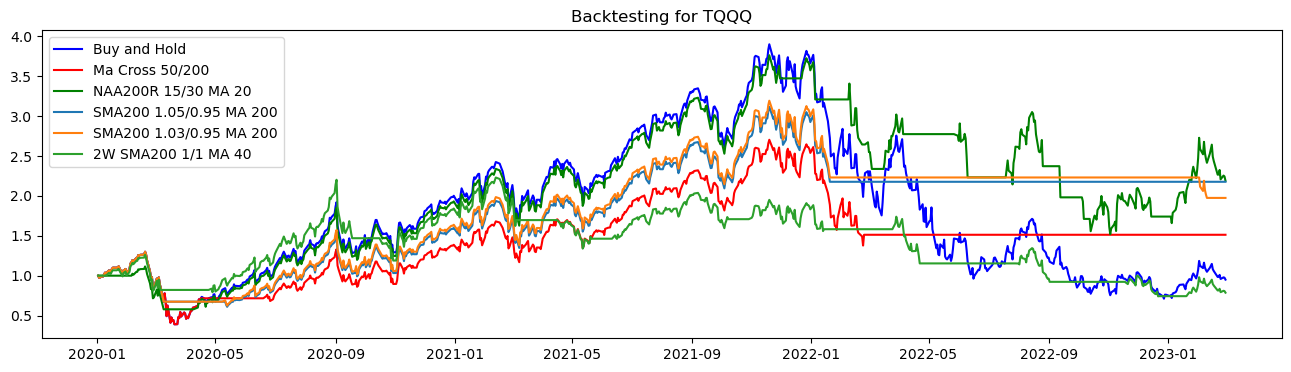

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,-0.049317,NaN,-0.811138,0.026773,0.001465,0.054716,1155
0,Ma Cross 50/200,3,0.512645,-0.125090,-0.699221,0.034070,0.001435,0.042133,1155
0,NAA200R 15/30 MA 20,14,1.188715,0.035179,-0.596052,0.044845,0.001802,0.040174,1155
0,SMA200 1.05/0.95 MA 200,3,1.176633,0.033066,-0.530692,0.046897,0.001502,0.032026,1155
0,SMA200 1.03/0.95 MA 200,4,0.974613,-0.005130,-0.519020,0.042987,0.001387,0.032262,1155
0,2W SMA200 1/1 MA 40,11,-0.213052,NaN,-0.611759,0.007814,0.000260,0.033320,1155


In [5]:
perf_summary = backtestAll(tqqq, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for SPY

Performance Summary of Buy and Hold: 
cumulative return      : 21.51%,
compound anual return  : -26.4613% 
max_drawdown           : -34.10%, 
sharp_ratio            : 2.36%, 
average of daily return: 0.0367%, 
std of daily return    : 1.5561%,
number of trades       : 2,
trading days           : 1155,
        
Betting Average  : 100.00%
Gain Average     : 21.51%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of Ma Cross 50/200: 
cumulative return      : 1.18%,
compound anual return  : -58.8464% 
max_drawdown           : -34.10%, 
sharp_ratio            : 0.73%, 
average of daily return: 0.0088%, 
std of daily return    : 1.2025%,
number of trades       : 4,
trading days           : 1155,
        
Betting Average  : 50.00%
Gain Average     : 32.64%
Loss Average     : -5.29%
Risk Reward Ratio: 6.17
Gain STD         : nan%
Loss STD         : nan%

Performance Summary of NAA200R 15/30 MA 20: 
cumulative 

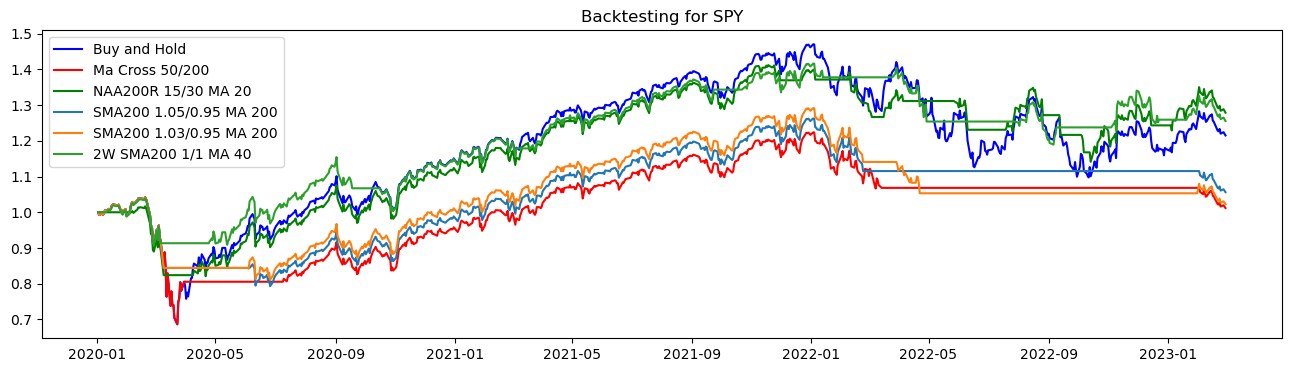

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,0.215071,-0.264613,-0.341047,0.023566,0.000367,0.015561,1155
0,Ma Cross 50/200,4,0.011804,-0.588464,-0.341047,0.007291,0.000088,0.012025,1155
0,NAA200R 15/30 MA 20,14,0.278907,-0.225375,-0.192412,0.034407,0.000366,0.010652,1155
0,SMA200 1.05/0.95 MA 200,4,0.056373,-0.437381,-0.238444,0.012254,0.000109,0.008860,1155
0,SMA200 1.03/0.95 MA 200,5,0.022739,-0.530803,-0.220977,0.007695,0.000070,0.009103,1155
0,2W SMA200 1/1 MA 40,10,0.255634,-0.238756,-0.160256,0.035188,0.000331,0.009395,1155


In [6]:
perf_summary = backtestAll(spy, test_start, test_end, verbose = False)
display(perf_summary)